## KNN Assignment

1.Introduction
This assignment will help you to consolidate the concepts learnt in the
session.

2.Problem Statement
In this assignment, students will be using the K-nearest neighbors
algorithm to predict how many points NBA players scored in the 2013-2014
season.

A look at the data
Before we dive into the algorithm, let’s take a look at our data. Each row in
the data contains information on how a player performed in the 2013-2014
NBA season.

Download 'nba_2013.csv' file from this link:
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0


Here are some selected columns from the data:
player - name of the player
pos - the position of the player
g - number of games the player was in
gs - number of games the player started
pts - total points the player scored

There are many more columns in the data, mostly containing information
about average player game performance over the course of the season.
See this site for an explanation of the rest of them.
We can read our dataset in and figure out which columns are present:


import pandas
with open("nba_2013.csv", 'r') as csvfile:
nba = pandas.read_csv(csvfile)

NOTE:ThesolutionsharedthroughGithubshouldcontainthesource code
usedand thescreenshotoftheoutput.
3.Output

This assignment consists of 200 marks and has to be submitted in
.ipynb/PDF format in the upcoming session for evaluation.

In [1]:
import numpy as np
import pandas as pd

In [2]:
file_path="nba_2013.csv"

In [3]:
df=pd.read_csv(file_path)

In [4]:
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


 Splitting data for testing purpose

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
missing_info=df.isna().sum()

In [7]:
# visualizing missing values

In [8]:
missing_info.index  # to get index

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [9]:
label=np.array(missing_info.index) #to get index as array format

In [10]:
label

array(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg',
       'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.',
       'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk',
       'tov', 'pf', 'pts', 'season', 'season_end'], dtype=object)

In [11]:
missing_info.to_numpy()  # to get number of missing value in each column as array format

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0, 67,  0,  0,  3,  2,
        0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [12]:
df.shape

(481, 31)

In [13]:
df.shape[0]

481

In [14]:
height=missing_info.to_numpy()*100/df.shape[0]

In [15]:
height

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.41580042,
        0.        ,  0.        , 13.92931393,  0.        ,  0.        ,
        0.62370062,  0.41580042,  0.        ,  0.        ,  4.15800416,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [16]:
import seaborn as sns

In [17]:
sns.set()

In [18]:
import matplotlib.pyplot as plt

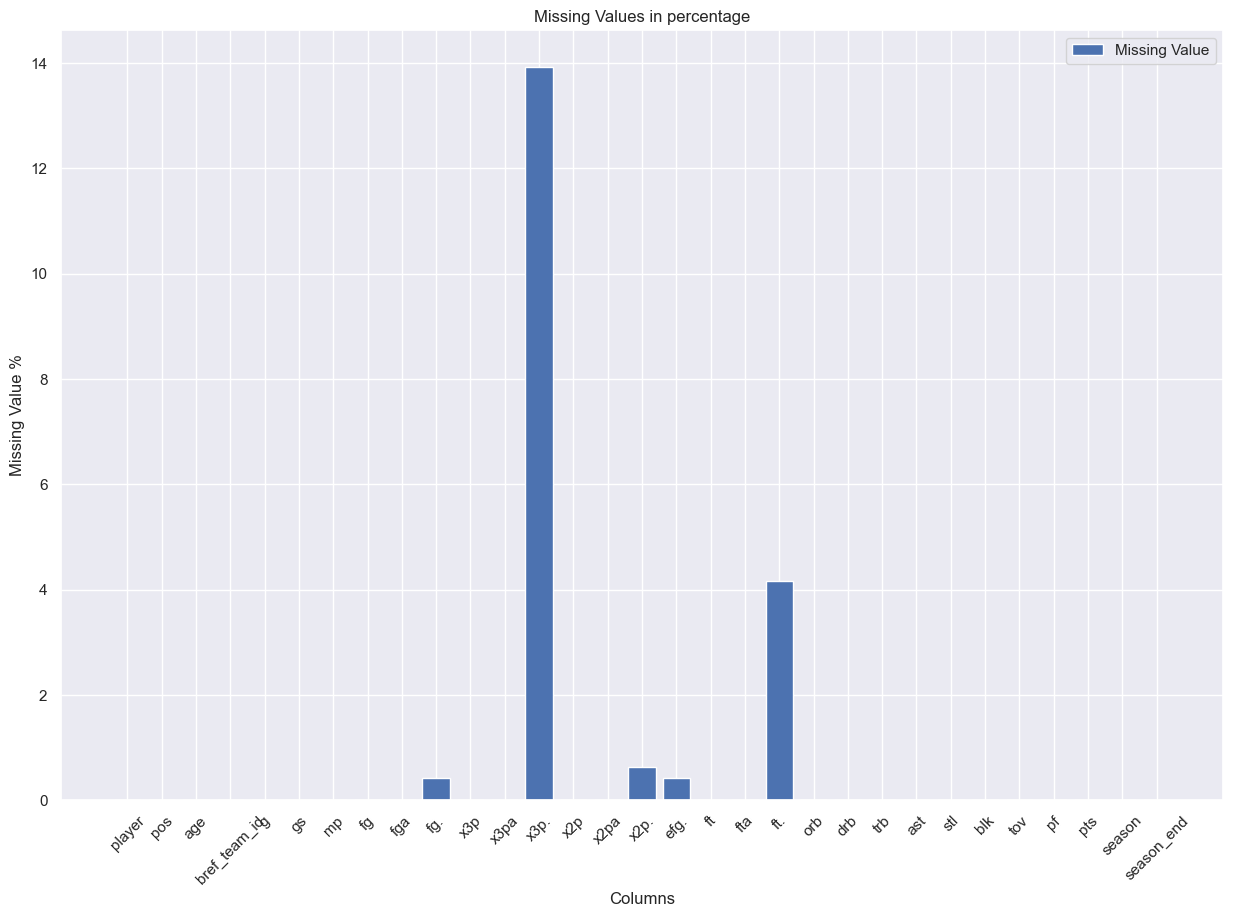

In [19]:
plt.figure(figsize=(15,10))
plt.title("Missing Values in percentage")
plt.bar(label,height,label="Missing Value")
plt.xlabel("Columns")
plt.yticks(range(0,15,2))
plt.ylabel("Missing Value %")
plt.xticks(rotation=45)
plt.legend()
plt.show()


Simplest way to visualize null values

In [20]:
import missingno as msno

In [21]:
import matplotlib.pyplot as plt

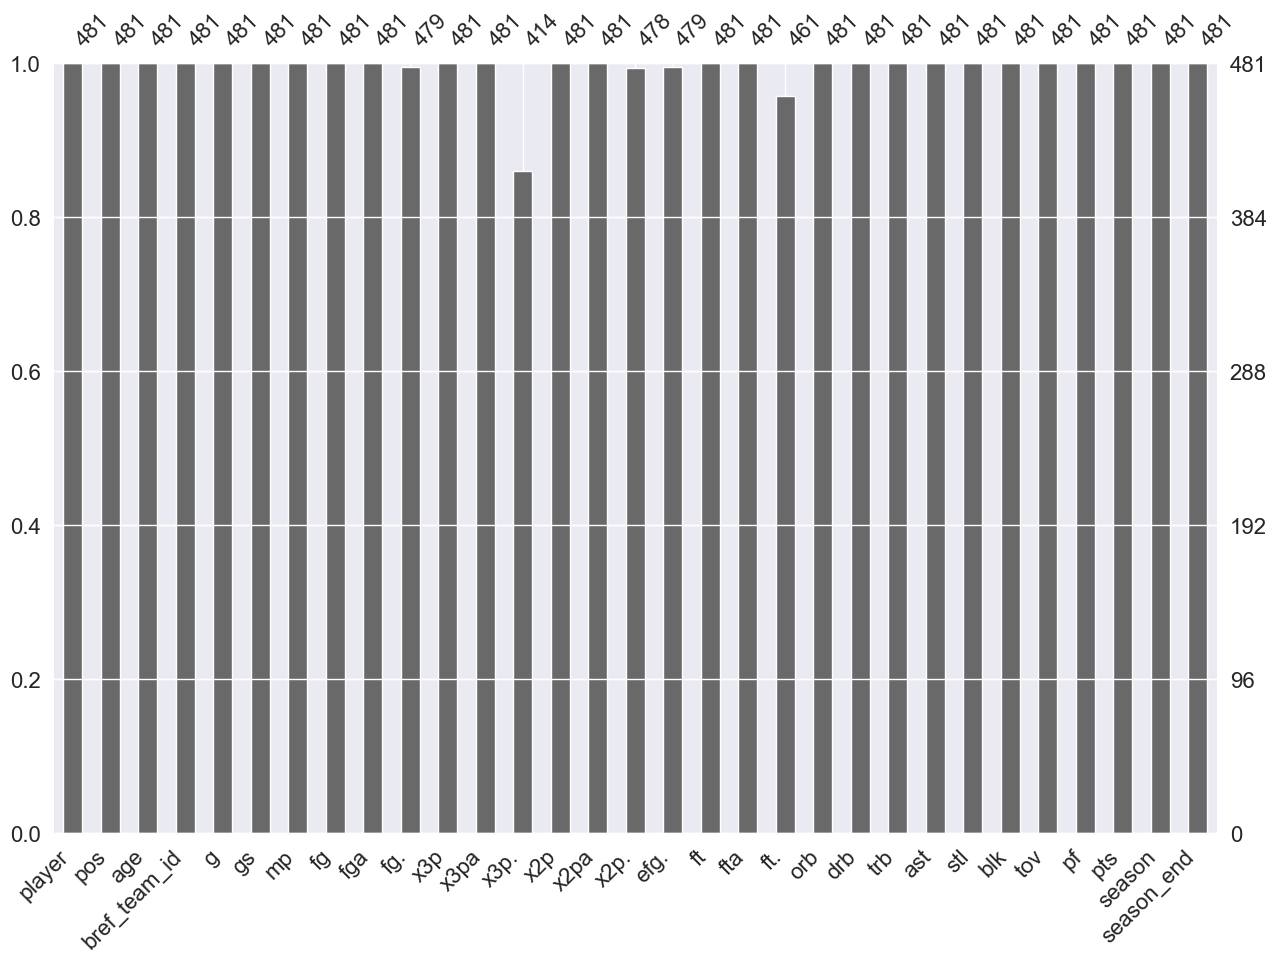

In [22]:
msno.bar(df=df,figsize=(15,10))
plt.show()

Visualizing transparent df of null value we can observe in which part of dataset contain null values

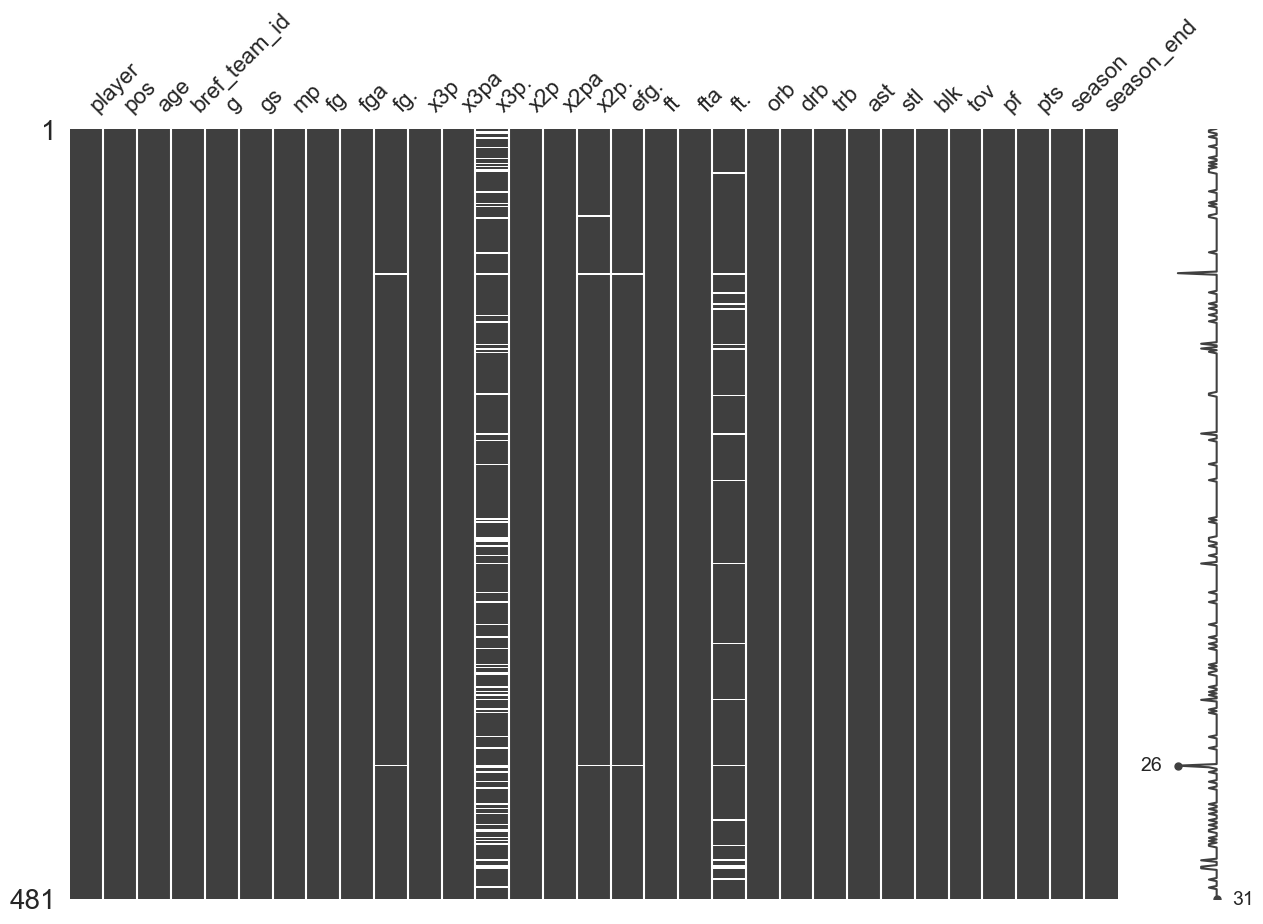

In [23]:
msno.matrix(df,figsize=(15,10))
plt.show()

Create feature Summary

In [24]:
summary=pd.DataFrame(df.dtypes,columns=['dtype'])

In [25]:
summary['num_missing']=df.isna().sum().values

In [26]:
summary['num_uniques']=df.nunique().values

In [27]:
summary.head()

,dtype,num_missing,num_uniques
player,object,0,481
pos,object,0,7
age,int64,0,21
bref_team_id,object,0,31
g,int64,0,82


In [28]:
data_form=[]
for col in df.columns:
    if df[col].dtype=='object':
        data_form.append('categorical')
    else:
        data_form.append('numerical')
        
    

In [29]:
summary['role']=data_form

In [30]:
summary

,dtype,num_missing,num_uniques,role
player,object,0,481,categorical
pos,object,0,7,categorical
age,int64,0,21,numerical
bref_team_id,object,0,31,categorical
g,int64,0,82,numerical
gs,int64,0,80,numerical
mp,int64,0,433,numerical
fg,int64,0,296,numerical
fga,int64,0,372,numerical
fg.,float64,2,212,numerical


In [31]:
# target Value visualiztion

C:\Users\sandipan\AppData\Local\Temp\ipykernel_5256\2181160861.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pts'])


<Axes: xlabel='pts', ylabel='Density'>

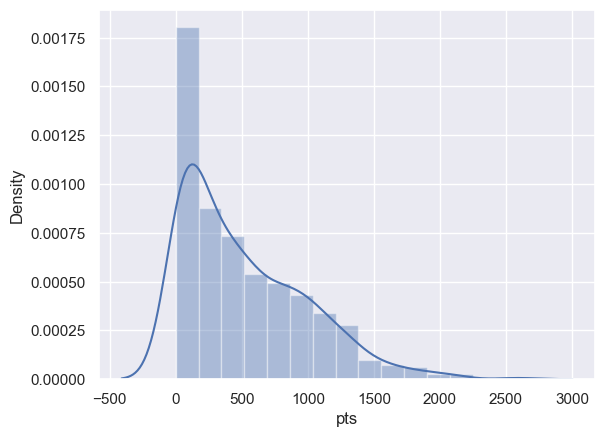

In [32]:
sns.distplot(df['pts'])

C:\Users\sandipan\AppData\Local\Temp\ipykernel_5256\369727368.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='OrRd')


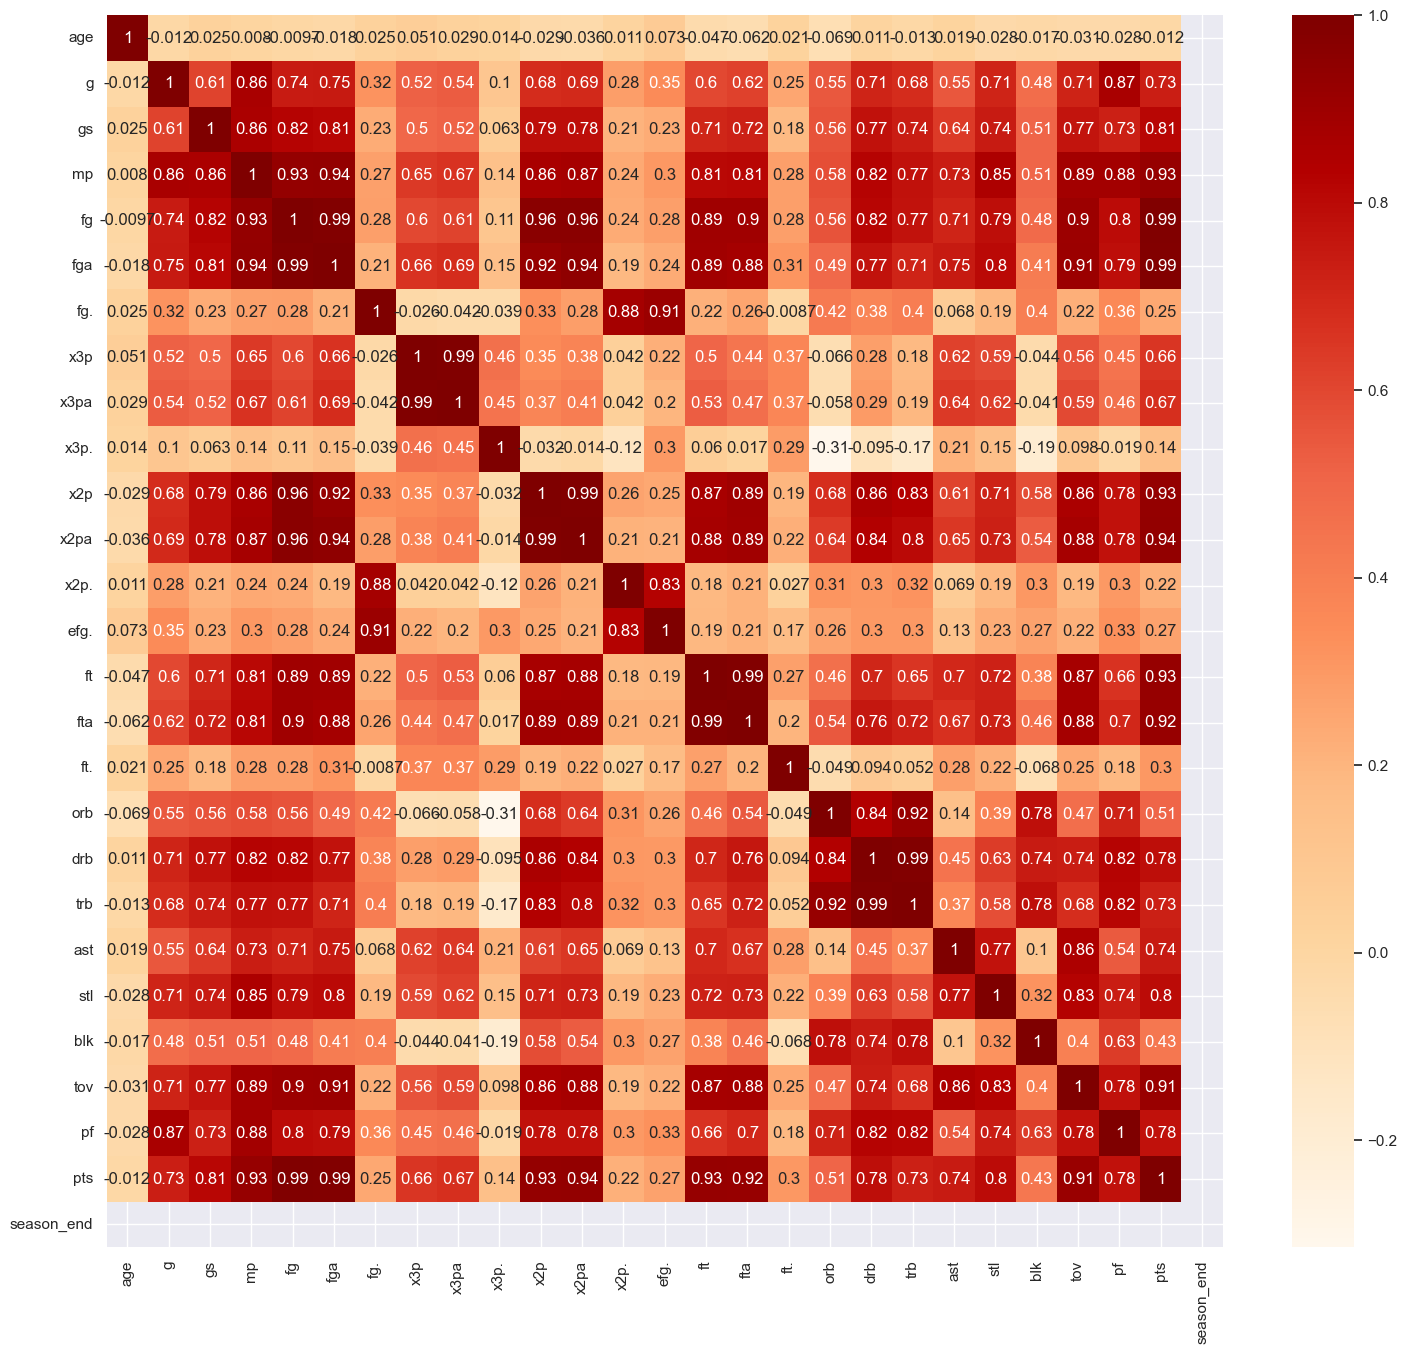

In [33]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(),annot=True,cmap='OrRd')
plt.show()

In [34]:
# set seed for reproducibility
np.random.seed(0)

In [35]:
df.sample(5)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
15,Ryan Anderson,PF,25,NOP,22,14,795,155,354,0.438,...,76,142,17,10,7,20,47,436,2013-2014,2013
124,Boris Diaw,PF,31,SAS,79,24,1974,302,580,0.521,...,252,326,222,44,32,121,140,717,2013-2014,2013
141,Kenneth Faried,PF,24,DEN,80,77,2178,447,820,0.545,...,446,684,96,70,69,135,193,1096,2013-2014,2013
263,Ricky Ledo,SG,21,DAL,11,0,33,6,17,0.353,...,2,2,2,1,0,2,2,19,2013-2014,2013
170,Eric Gordon,SG,25,NOP,64,64,2057,356,817,0.436,...,135,165,208,74,12,134,114,988,2013-2014,2013


In [36]:
summary

,dtype,num_missing,num_uniques,role
player,object,0,481,categorical
pos,object,0,7,categorical
age,int64,0,21,numerical
bref_team_id,object,0,31,categorical
g,int64,0,82,numerical
gs,int64,0,80,numerical
mp,int64,0,433,numerical
fg,int64,0,296,numerical
fga,int64,0,372,numerical
fg.,float64,2,212,numerical


Seems like our data set have some null values. It would be better if we can see whar percentage of data is missing

In [37]:
summary['Missing values in percentage']=(summary['num_missing']*100)/df.shape[0]

In [38]:
summary

,dtype,num_missing,num_uniques,role,Missing values in percentage
player,object,0,481,categorical,0.000000
pos,object,0,7,categorical,0.000000
age,int64,0,21,numerical,0.000000
bref_team_id,object,0,31,categorical,0.000000
g,int64,0,82,numerical,0.000000
gs,int64,0,80,numerical,0.000000
mp,int64,0,433,numerical,0.000000
fg,int64,0,296,numerical,0.000000
fga,int64,0,372,numerical,0.000000
fg.,float64,2,212,numerical,0.415800


Around 14% of data contains null values for column x3p.

### Why the data is missing?

In [39]:
column_have_null_values=summary[summary['num_missing']!=0].index

In [40]:
df[column_have_null_values].replace(np.nan,)

,fg.,x3p.,x2p.,efg.,ft.
0,0.468,0.266667,0.492063,0.482,0.660
1,0.503,0.266667,0.502703,0.503,0.581
2,0.520,0.266667,0.520000,0.520,0.639
3,0.459,0.426667,0.472574,0.522,0.815
4,0.546,0.000000,0.548387,0.546,0.836
...,...,...,...,...,...
476,0.427,0.212766,0.491935,0.452,0.641
477,0.435,0.385714,0.467532,0.511,0.825
478,0.454,0.308219,0.496468,0.489,0.712
479,0.426,0.000000,0.426799,0.426,0.730


In [41]:
for col in column_have_null_values:
    df[col].replace(np.nan,df[col].mean(),inplace=True)

In [42]:
df.isna().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

We have fix null value by imputing with mean


We can drop rows or column which contain null values

In [43]:
df.describe(include="all")

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
count,481,481,481.000000,481,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481,481.0
unique,481,7,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,Quincy Acy,SG,NaN,TOT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-2014,NaN
freq,1,109,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,481,NaN
mean,NaN,NaN,26.509356,NaN,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,...,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,NaN,2013.0
std,NaN,NaN,4.198265,NaN,25.322711,29.658465,897.258840,171.832793,368.850833,0.098467,...,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,NaN,0.0
min,NaN,NaN,19.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2013.0
25%,NaN,NaN,23.000000,NaN,32.000000,0.000000,388.000000,47.000000,110.000000,0.401000,...,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,NaN,2013.0
50%,NaN,NaN,26.000000,NaN,61.000000,10.000000,1141.000000,146.000000,332.000000,0.437000,...,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,NaN,2013.0
75%,NaN,NaN,29.000000,NaN,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479000,...,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,NaN,2013.0


In [44]:
#sns.pairplot(df)
#plt.show()

C:\Users\sandipan\AppData\Local\Temp\ipykernel_5256\4114317165.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\sandipan\AppData\Local\Temp\ipykernel_5256\4114317165.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\sandipan\AppData\Local\Temp\ipykernel_5

C:\Users\sandipan\AppData\Local\Temp\ipykernel_5256\4114317165.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\sandipan\AppData\Local\Temp\ipykernel_5256\4114317165.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\sandipan\AppData\Local\Temp\ipykernel_5

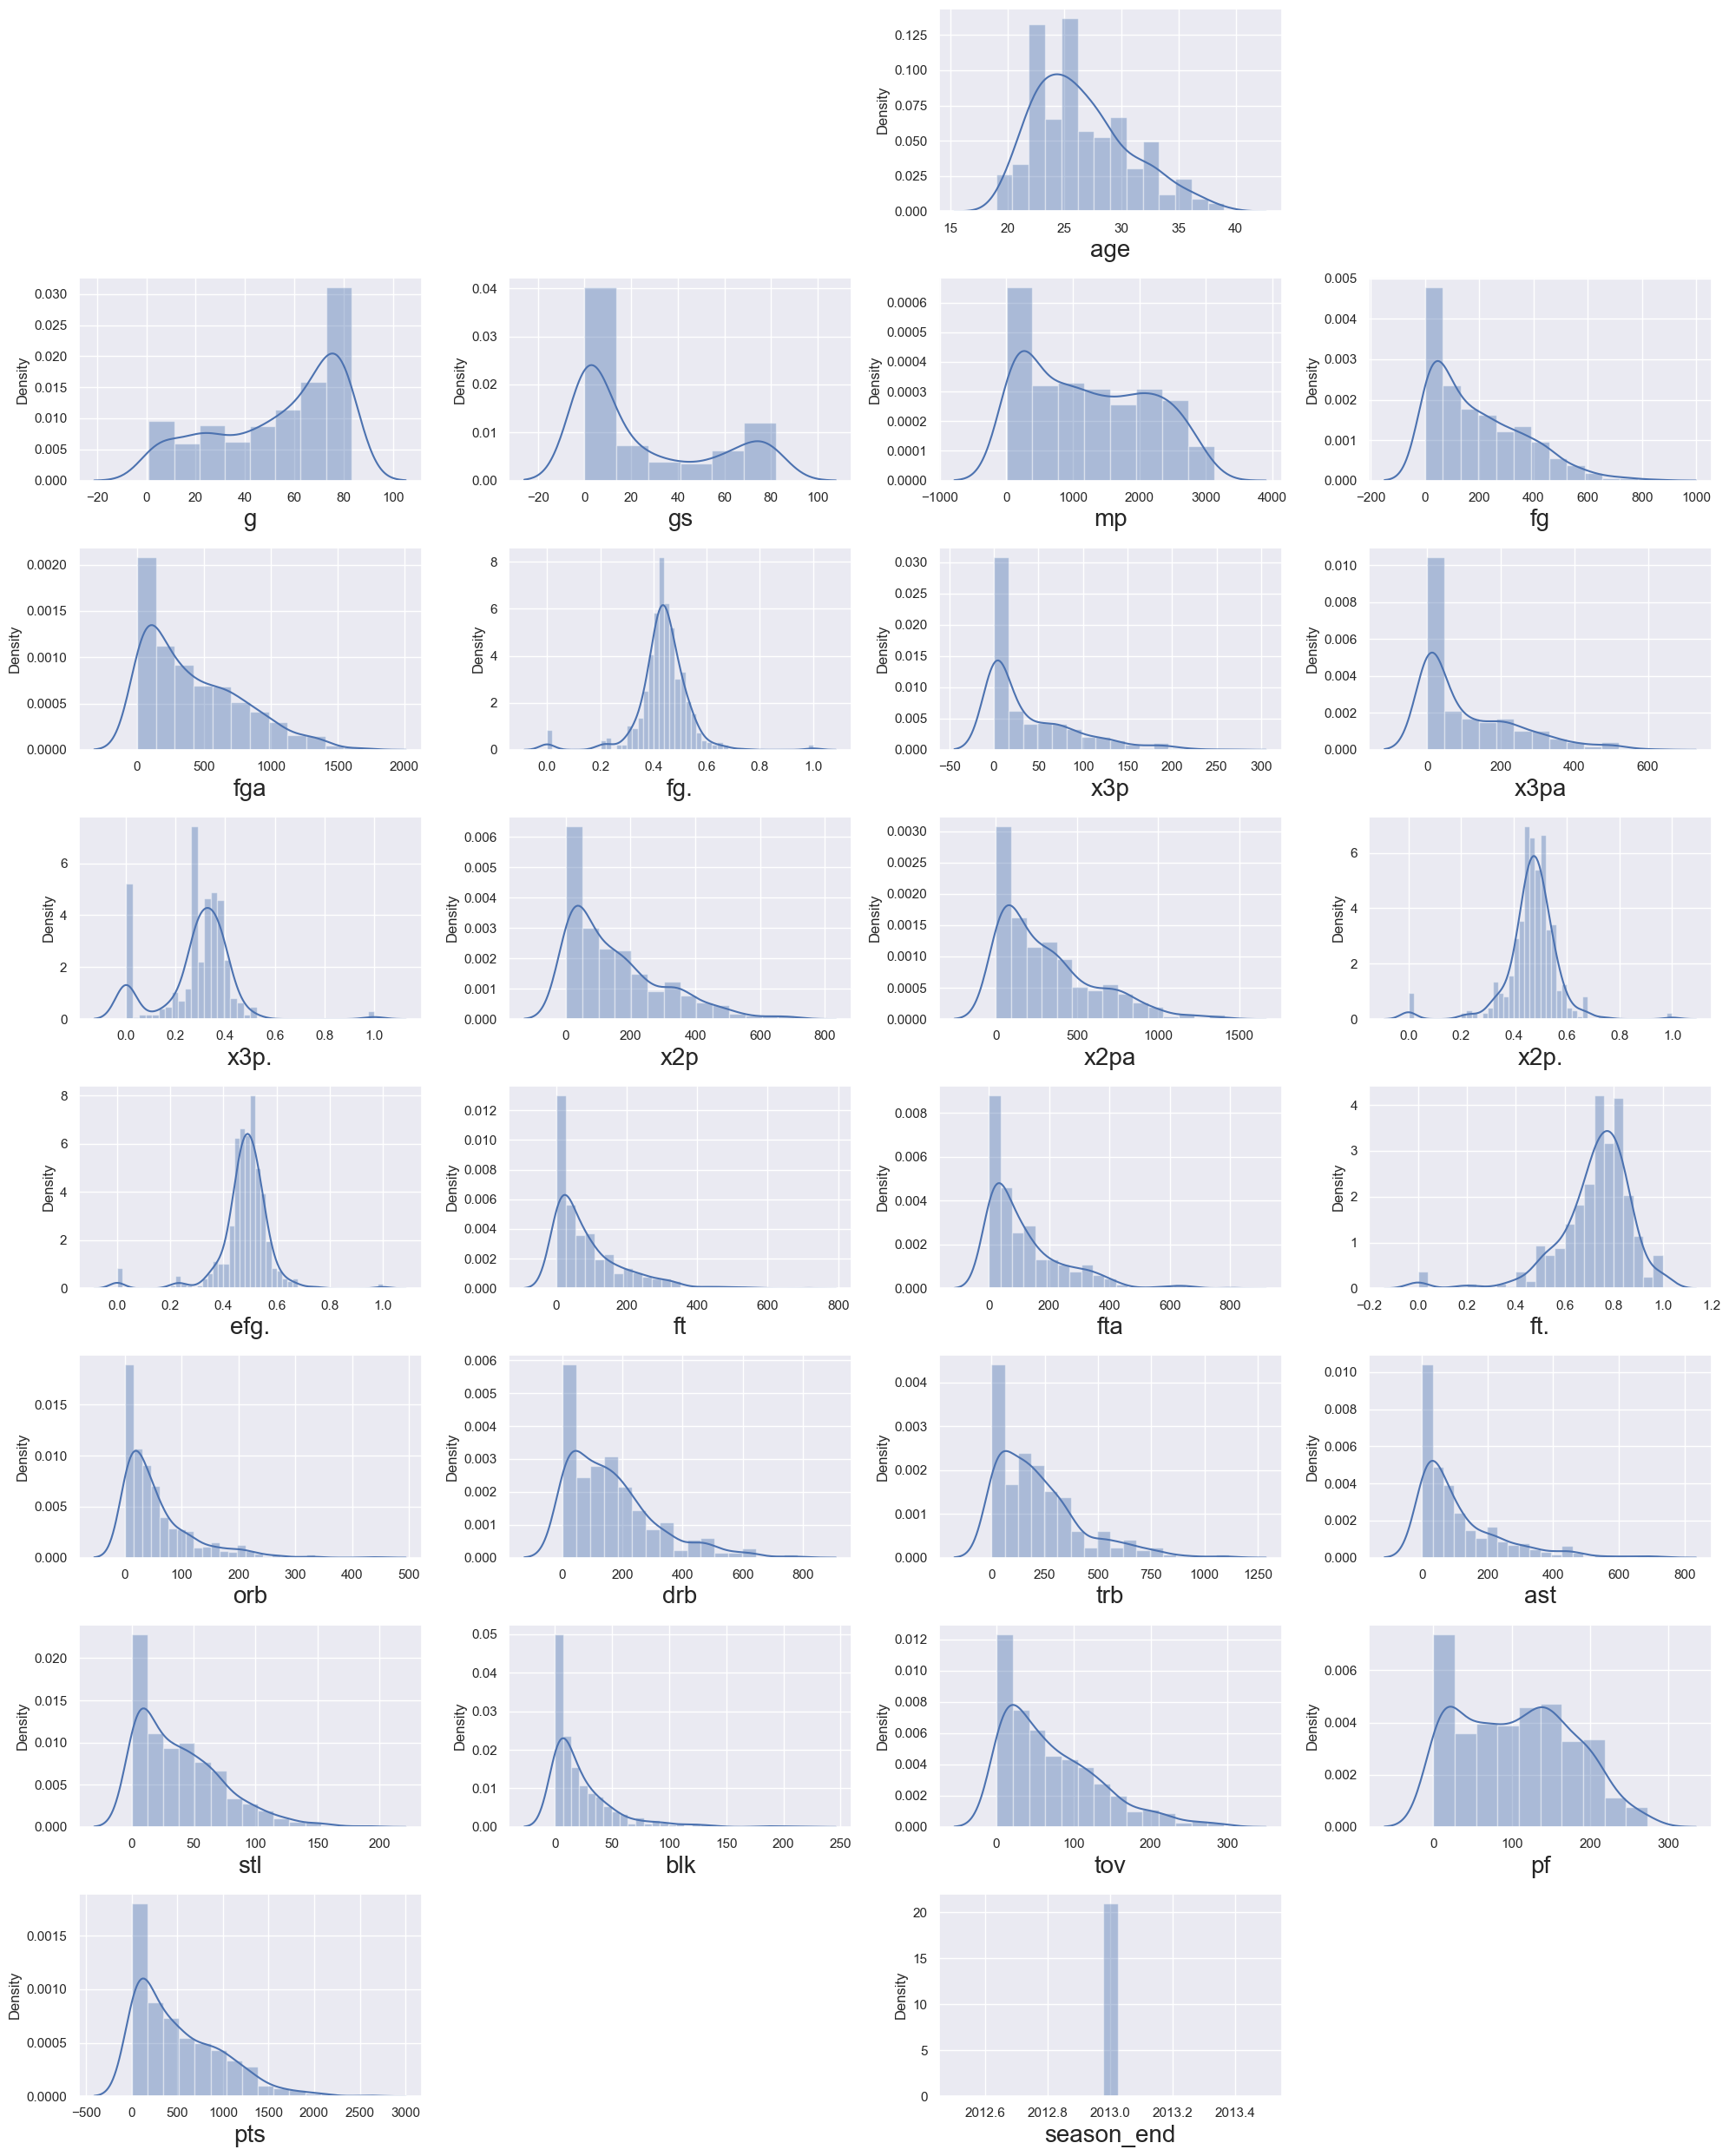

In [45]:
plt.figure(figsize=(20,25),facecolor='white')
grid=1

for col in df:
    if df[col].dtype!="object":
        if grid<=31:
            ax=plt.subplot(8,4,grid)
            sns.distplot(df[col])
            plt.xlabel(col,fontsize=20)
    grid=grid+1
plt.tight_layout()

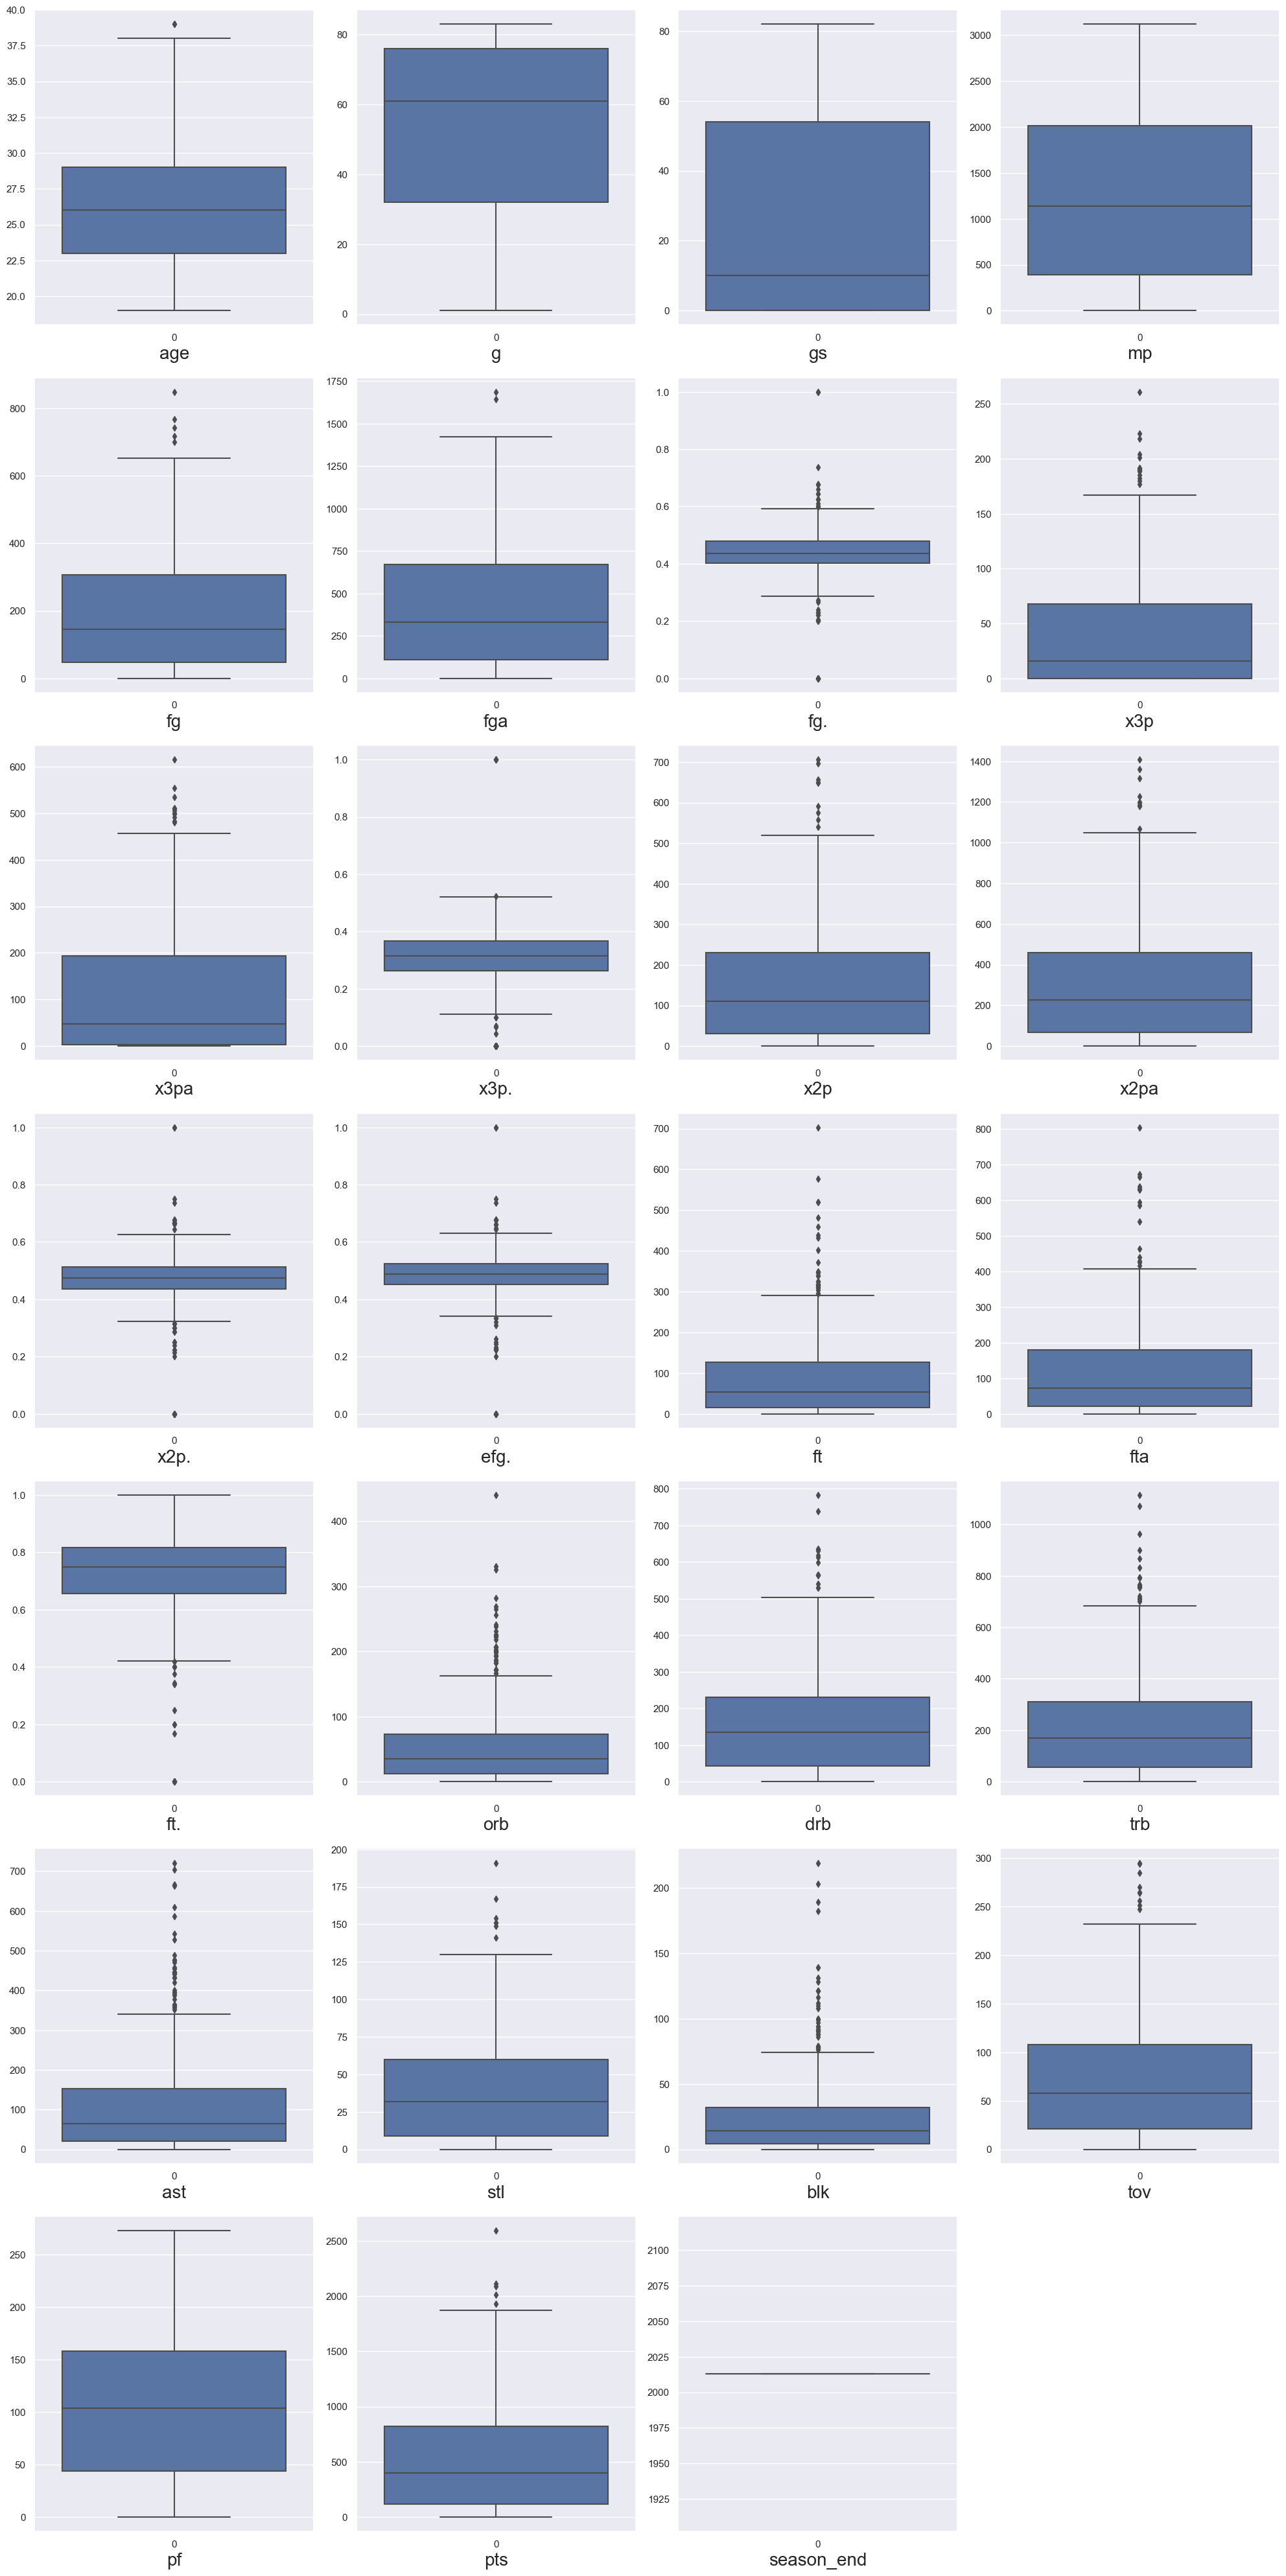

In [46]:
plt.figure(figsize=(20,45),facecolor='white')

grid=1

for col in df:
    if df[col].dtype!="object":
        if grid<31:
            plt.subplot(8,4,grid)
            sns.boxplot(df[col],orient="vertical")
            plt.xlabel(col,fontsize=20)
            
        grid=grid+1
plt.tight_layout()
            

In [47]:
# first we will convert categorical variable to numerical 

In [48]:
df['pos'].unique()

array(['SF', 'C', 'PF', 'SG', 'PG', 'G', 'F'], dtype=object)

In [49]:
df=df.join(pd.get_dummies(df['pos'],prefix="pos").iloc[:,1:],how="inner")

In [50]:
df.drop(columns=['pos'],inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   age           481 non-null    int64  
 2   bref_team_id  481 non-null    object 
 3   g             481 non-null    int64  
 4   gs            481 non-null    int64  
 5   mp            481 non-null    int64  
 6   fg            481 non-null    int64  
 7   fga           481 non-null    int64  
 8   fg.           481 non-null    float64
 9   x3p           481 non-null    int64  
 10  x3pa          481 non-null    int64  
 11  x3p.          481 non-null    float64
 12  x2p           481 non-null    int64  
 13  x2pa          481 non-null    int64  
 14  x2p.          481 non-null    float64
 15  efg.          481 non-null    float64
 16  ft            481 non-null    int64  
 17  fta           481 non-null    int64  
 18  ft.           481 non-null    

In [52]:
# droping unnecessary columns

unusedcolumns=['season_end','season','bref_team_id','player']

In [53]:
df.drop(columns=unusedcolumns,axis=1,inplace=True)

In [54]:
df.columns

Index(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.',
       'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb',
       'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'pos_F', 'pos_G', 'pos_PF',
       'pos_PG', 'pos_SF', 'pos_SG'],
      dtype='object')

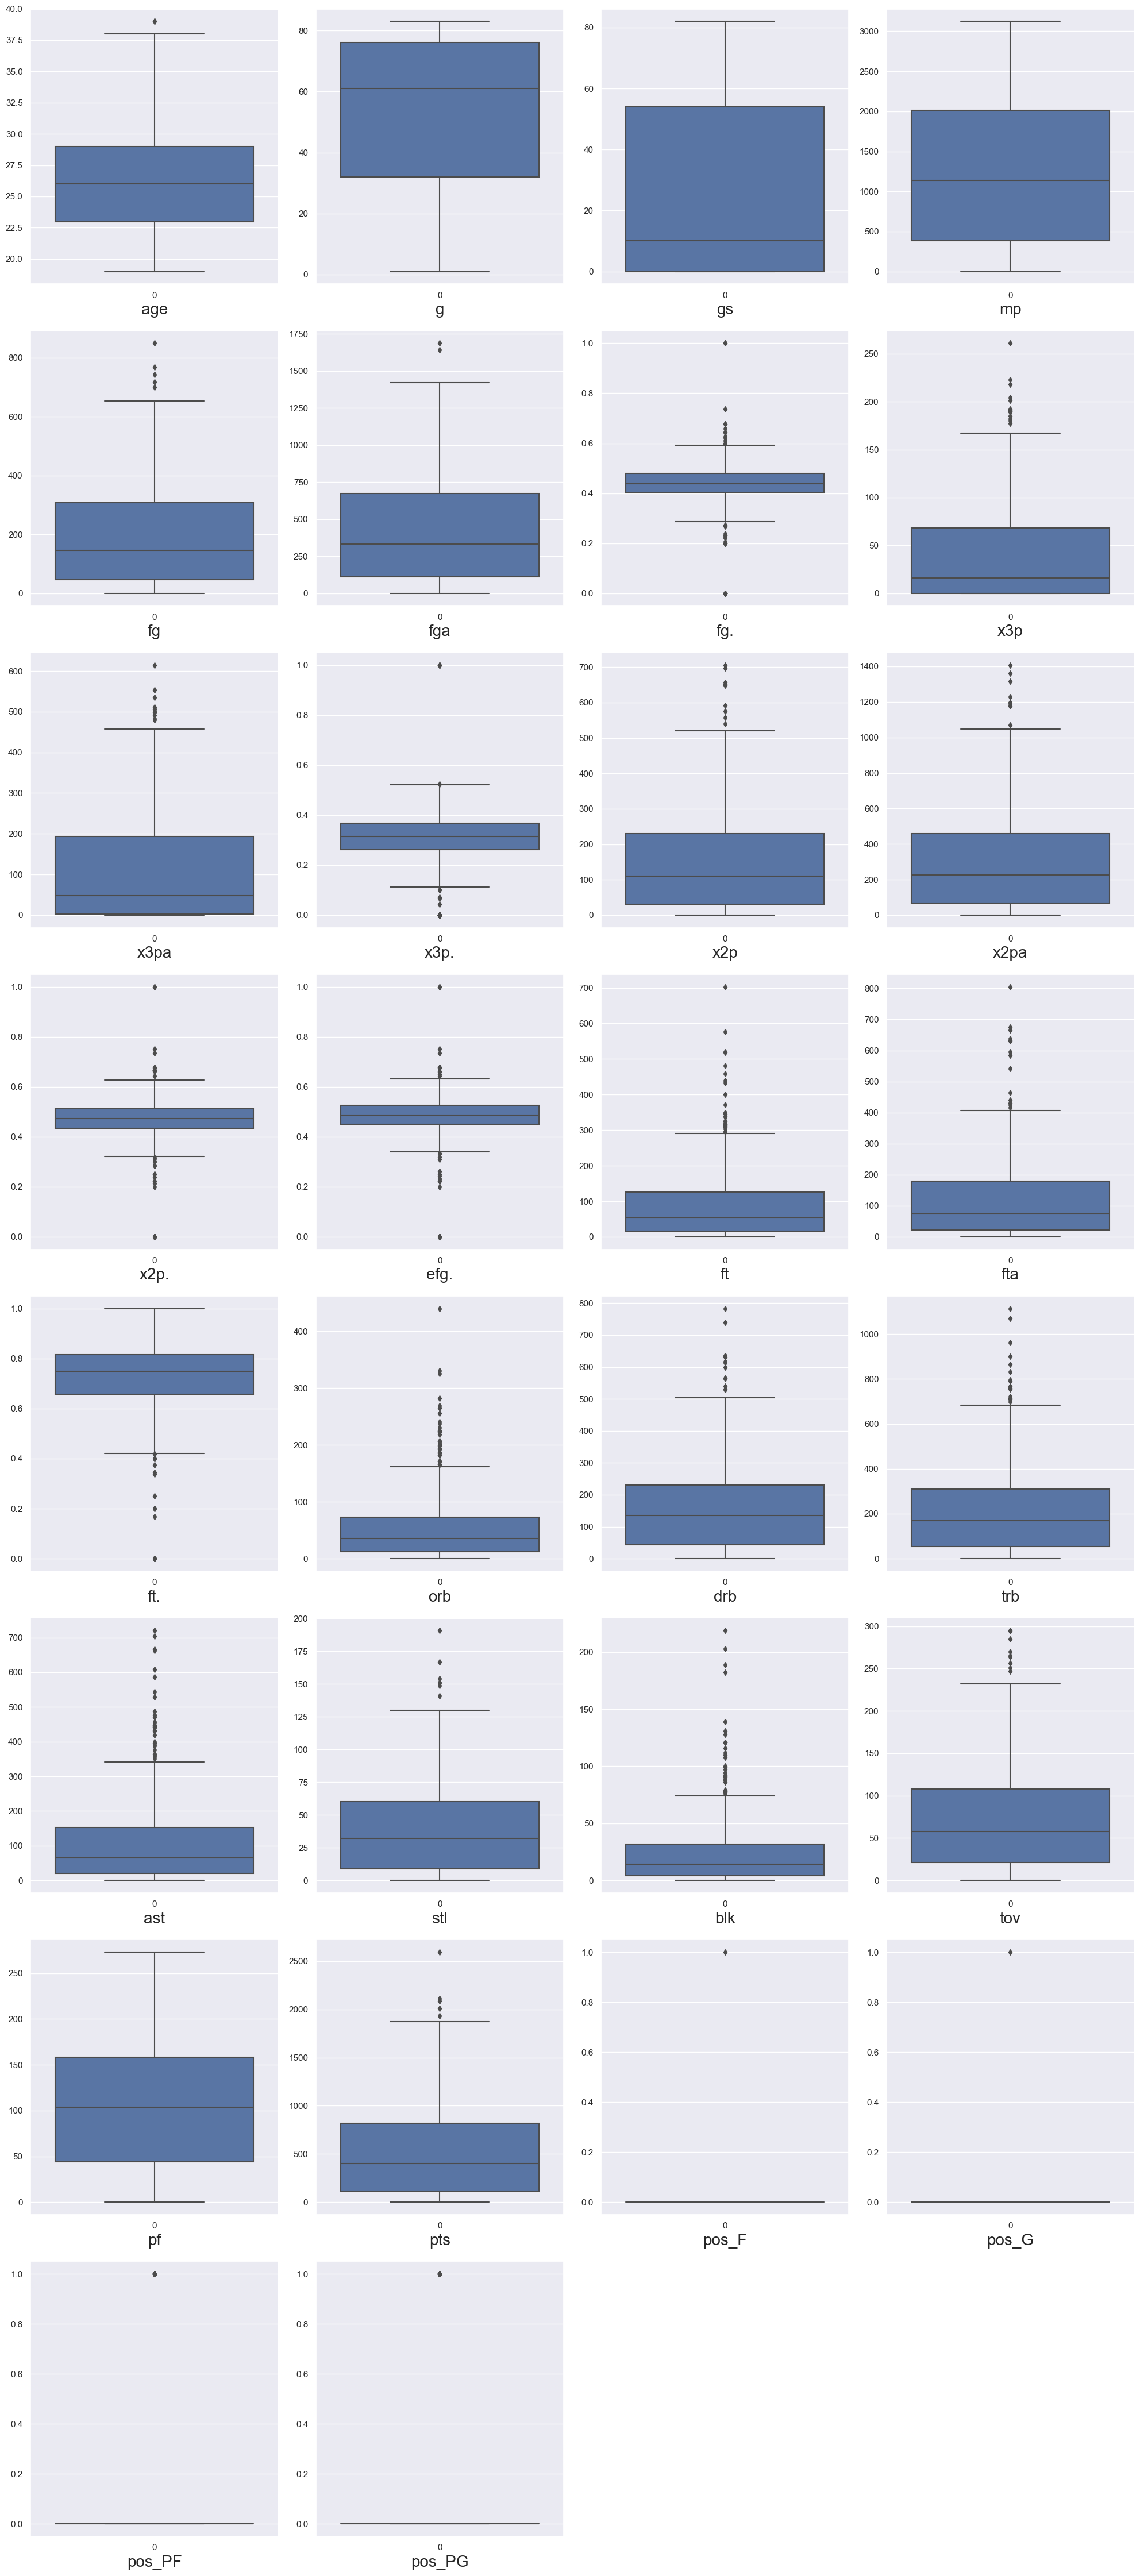

In [55]:
plt.figure(figsize=(20,45),facecolor='white')

grid=1

for col in df:
    if df[col].dtype!="object":
        if grid<31:
            plt.subplot(8,4,grid)
            sns.boxplot(df[col],orient="vertical")
            plt.xlabel(col,fontsize=20)
            
        grid=grid+1
plt.tight_layout()
            

In [56]:
from sklearn.preprocessing import minmax_scale

In [57]:
X,y=minmax_scale(df.drop(columns=['pts'],axis=1),feature_range=(-1,1)),df['pts']

In [58]:
y

0       171
1       265
2       362
3      1330
4       328
       ... 
476     939
477    1144
478    1417
479     490
480     399
Name: pts, Length: 481, dtype: int64

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scale=StandardScaler()

In [61]:
X=scale.fit_transform(X)

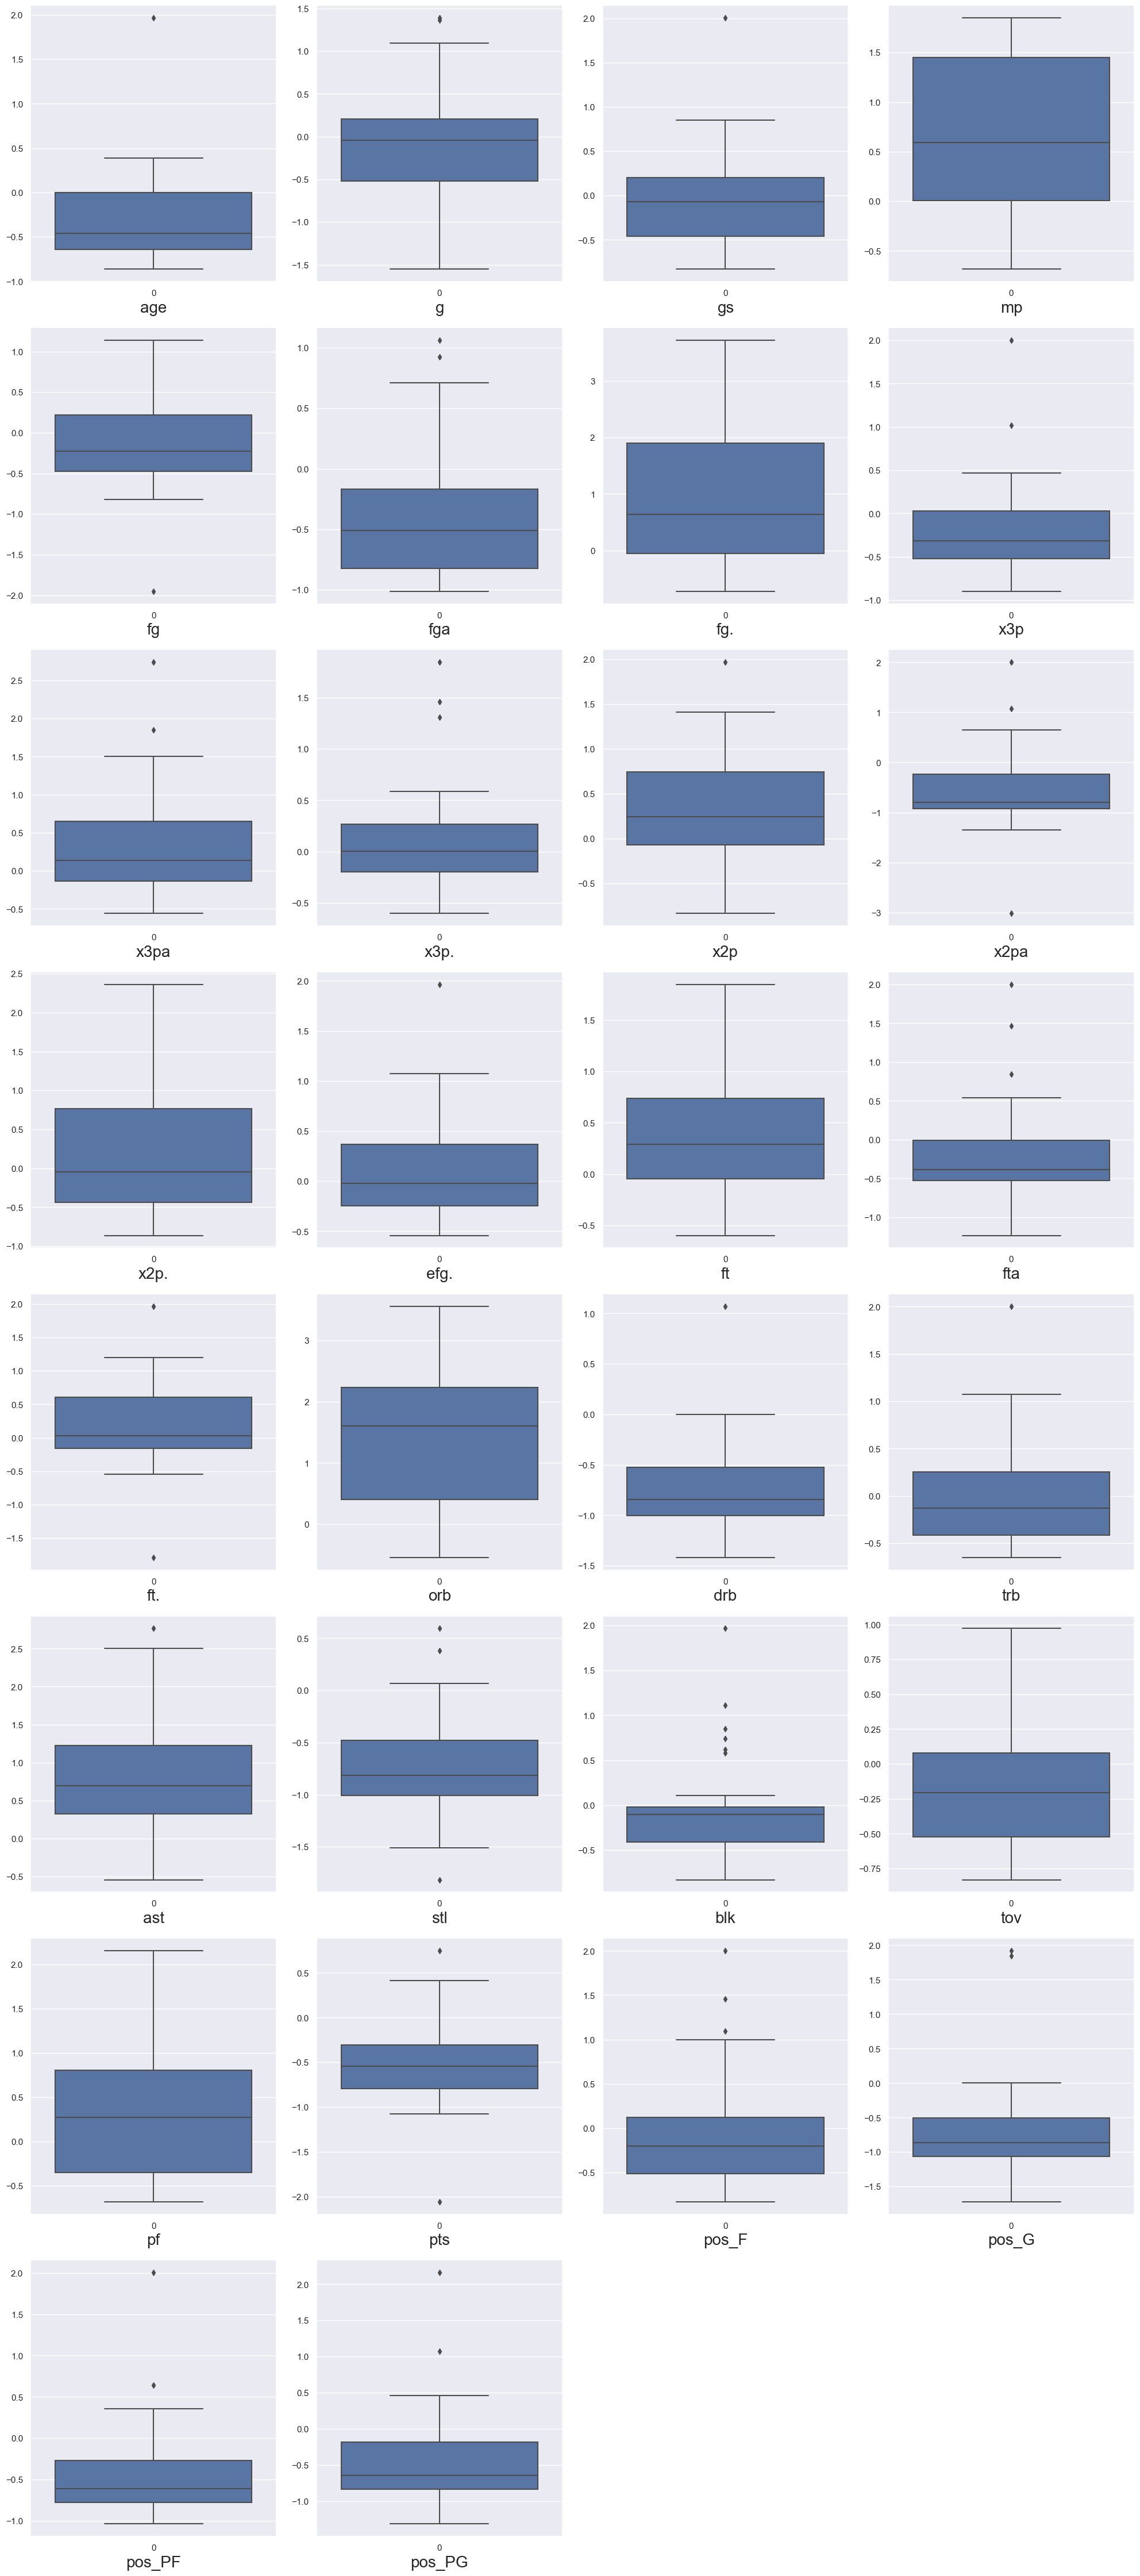

In [62]:
plt.figure(figsize=(20,45),facecolor='white')

grid=1

for col in df:
    if df[col].dtype!="object":
        if grid<31:
            plt.subplot(8,4,grid)
            sns.boxplot(X[grid-1],orient="vertical")
            plt.xlabel(col,fontsize=20)
            
        grid=grid+1
plt.tight_layout()
            

In [63]:
#Above graph we can interpret that we have resolved outliers till some extent?

In [64]:
columns=list(df.columns)

C:\Users\sandipan\AppData\Local\Temp\ipykernel_5256\230669304.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[:,columns.index('blk')])


<Axes: ylabel='Density'>

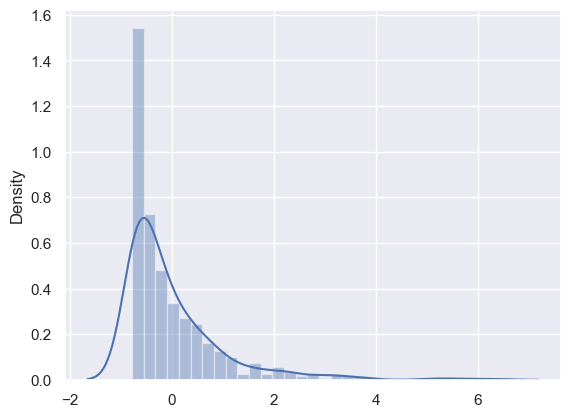

In [65]:
sns.distplot(X[:,columns.index('blk')])

In [66]:
q=np.quantile(X[:,columns.index('blk')],0.95)

In [67]:
q

2.07163671864222

In [68]:

y=y[np.where(X[:,columns.index('blk')]<q)[0]]


In [69]:

X=X[np.where(X[:,columns.index('blk')]<q)[0],:]

In [70]:
# we have removed few outlier from blk column

In [71]:
X.shape

(455, 31)

In [72]:
y.shape

(455,)

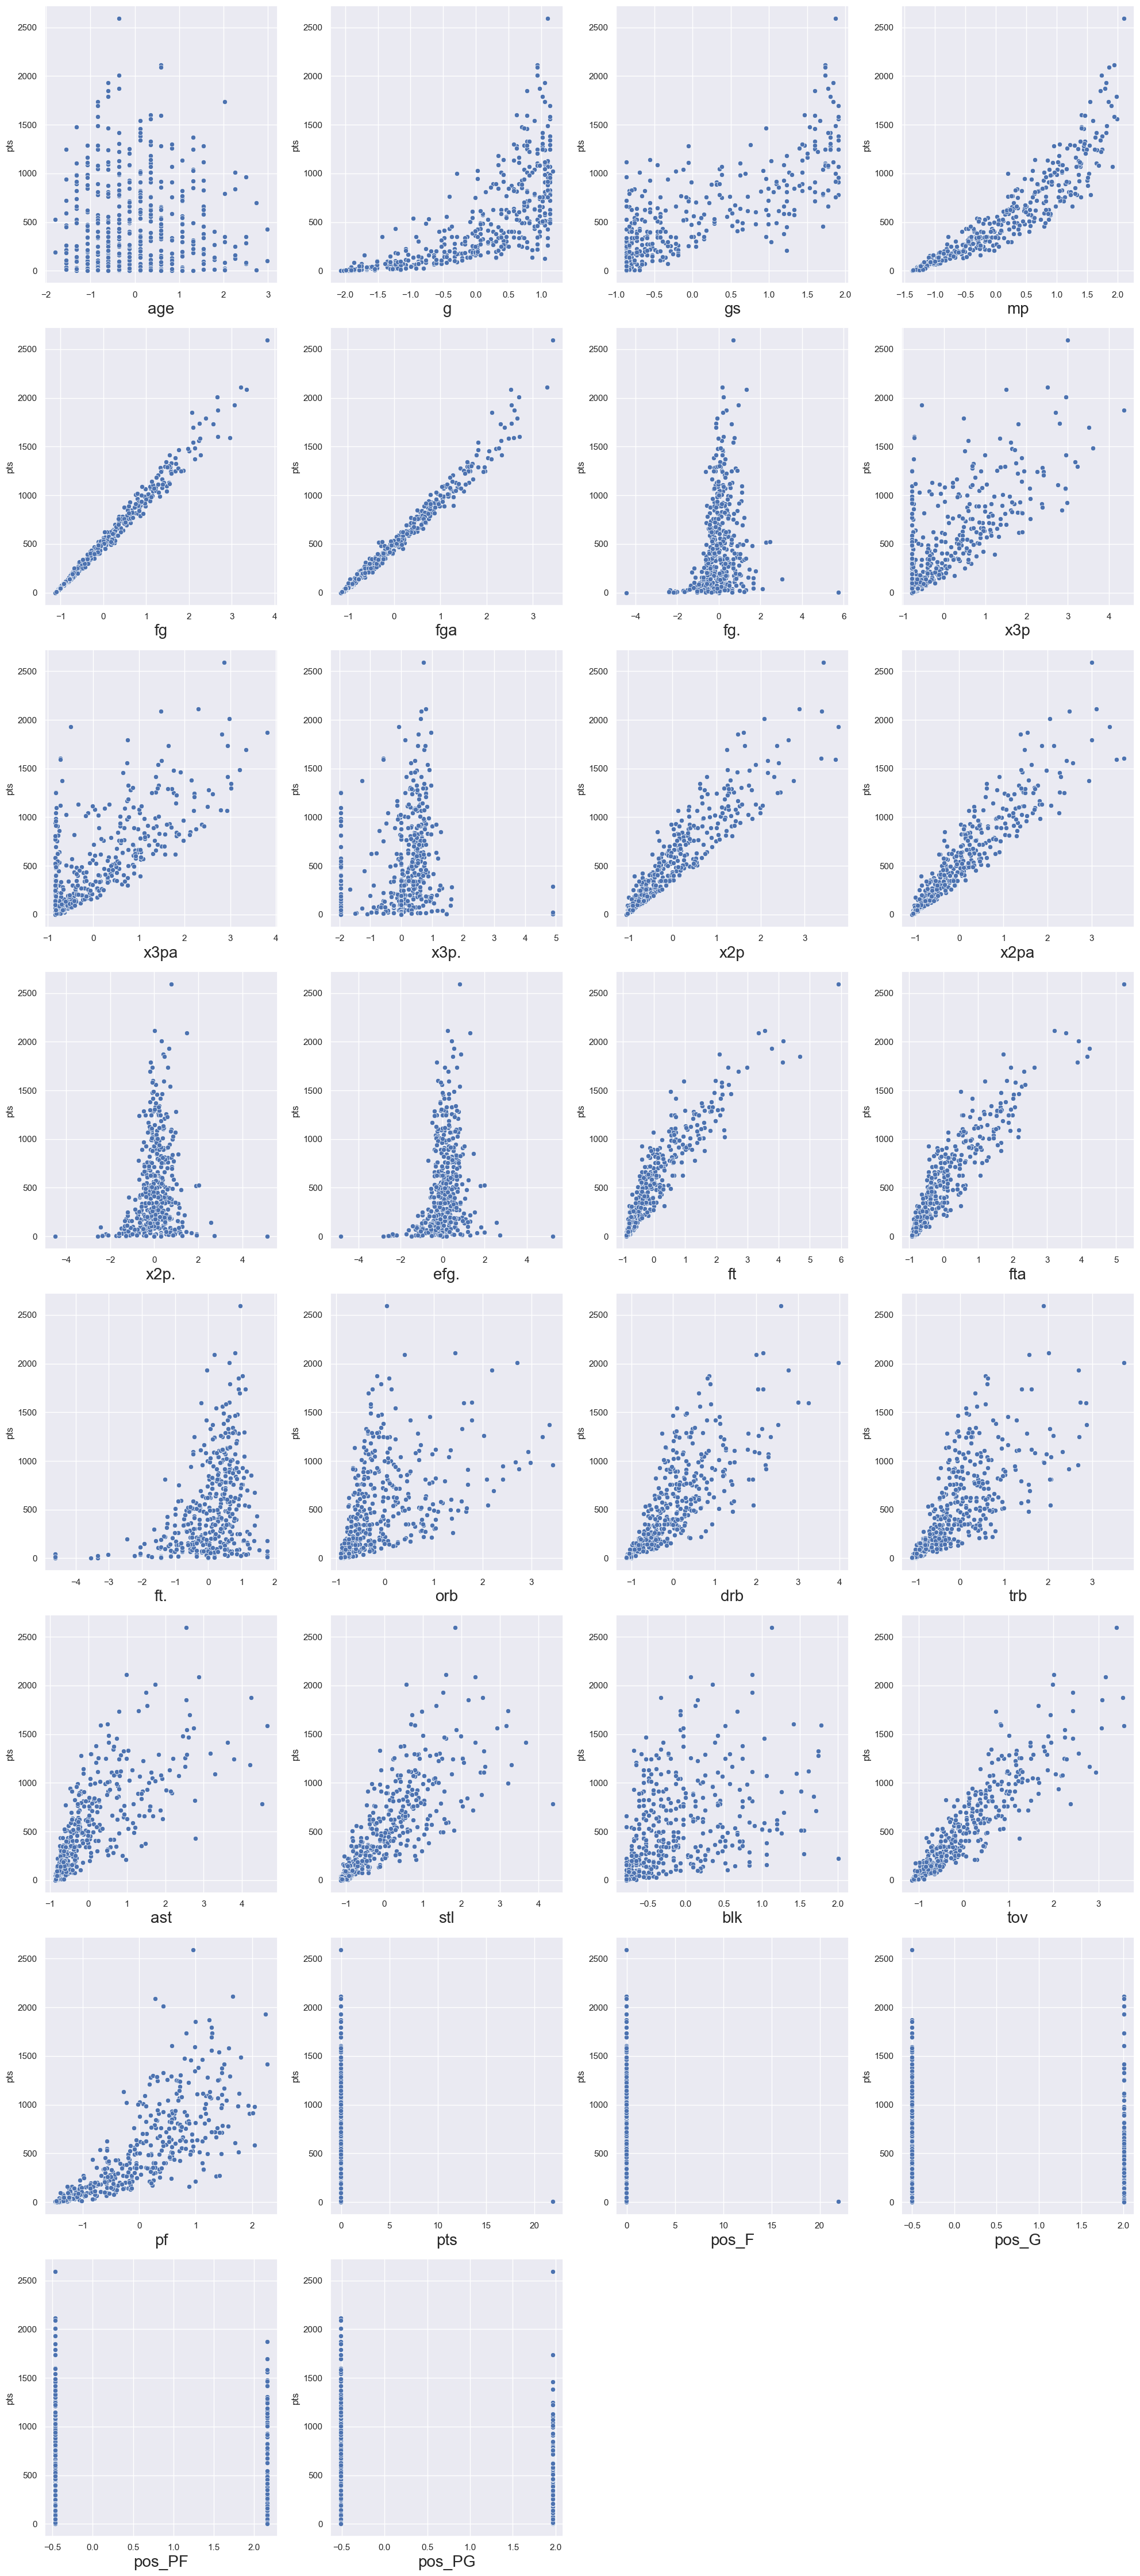

In [74]:
plt.figure(figsize=(20, 45), facecolor='white')

grid = 1

for col in range(len(X[0, :])):
    if grid < 31:
        plt.subplot(8, 4, grid)

        sns.scatterplot(x=X[:, col], y=y)  # Specify x and y here
        plt.xlabel(columns[col], fontsize=20)

        grid = grid + 1

plt.tight_layout()

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [77]:
from sklearn.neighbors import KNeighborsRegressor

In [78]:
from sklearn.metrics import r2_score

In [79]:
knn_reg=KNeighborsRegressor(n_neighbors=5,n_jobs=-1)

In [80]:
knn_reg.fit(X_train,y_train)

KNeighborsRegressor(n_jobs=-1)

In [81]:
yhat_train=knn_reg.predict(X_train)

In [82]:
r2_score(y_train,yhat_train)

0.9707664704862634

In [83]:
yhat_test=knn_reg.predict(X_test)

In [84]:
r2_score(y_test,yhat_test)

0.9509611965549083

In [85]:
r2_score_train=[]
r2_score_test=[]
neighbor_count=[]
for i in range(1,25):
    neighbor_count.append(i)
    knn_reg=KNeighborsRegressor(n_neighbors=i)
    knn_reg.fit(X_train,y_train)
    yhat_train=knn_reg.predict(X_train)
    r2_score_train.append(r2_score(y_train,yhat_train))
    yhat_test=knn_reg.predict(X_test)
    r2_score_test.append(r2_score(y_test,yhat_test))
        

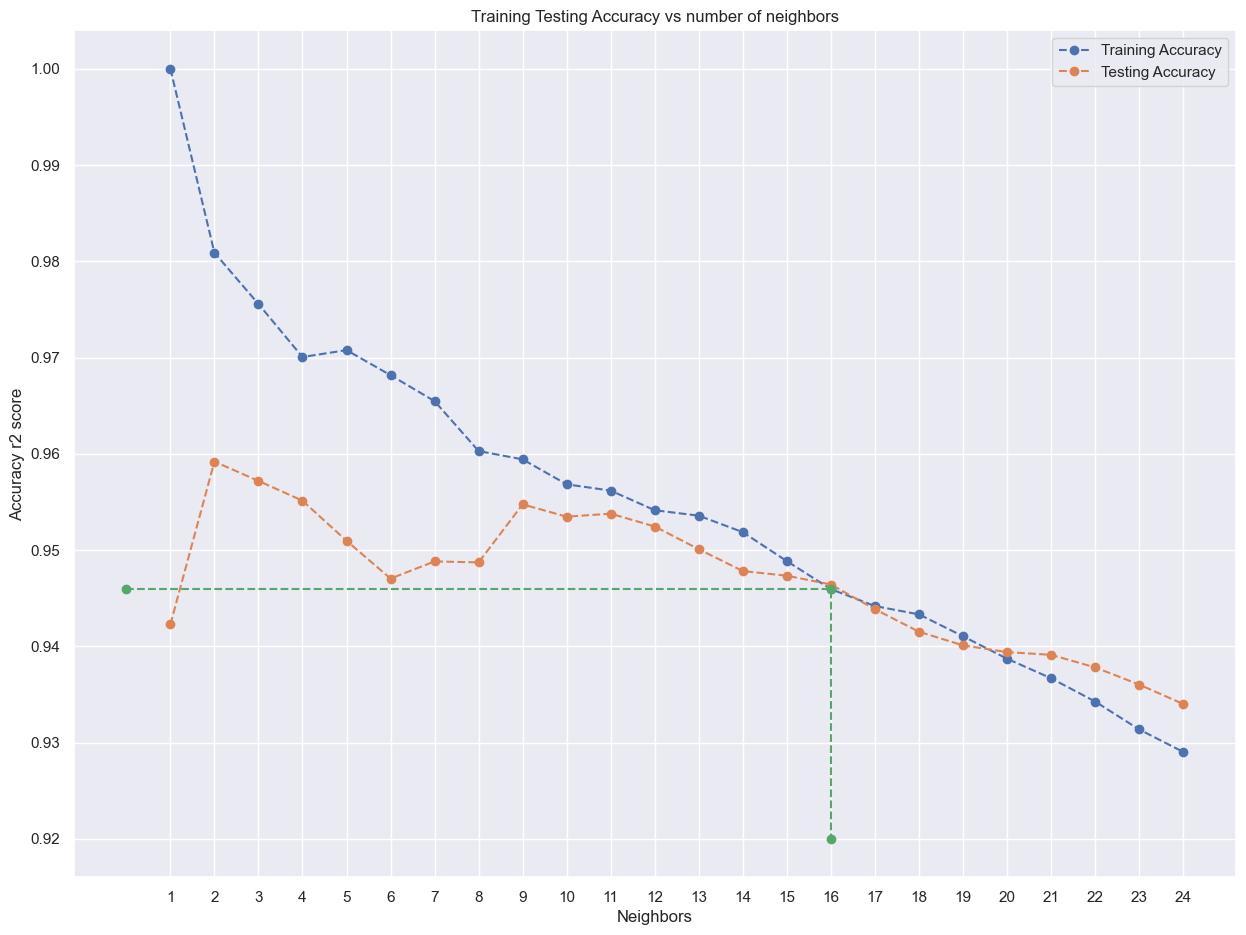

In [86]:
plt.figure(figsize=(15,11))
plt.title("Training Testing Accuracy vs number of neighbors")
plt.plot(neighbor_count,r2_score_train,marker='o',linestyle="dashed")

plt.plot(neighbor_count,r2_score_test,marker='o',linestyle="dashed")
plt.legend(["Training Accuracy","Testing Accuracy"])
plt.xlabel("Neighbors")
plt.ylabel("Accuracy r2 score")
plt.plot([0,16,16],[0.946,0.946,0.92],marker='o',linestyle="dashed")
plt.xticks(range(1,25))
plt.show()

From above graph we can conclude that we should use n_neighbor=16 because we have training and testing accuracy same and we will have more generalize model

In [87]:
knn_reg=KNeighborsRegressor(n_neighbors=16)
knn_reg.fit(X_train,y_train)
yhat_train=knn_reg.predict(X_train)
print('Training Accuracy',(r2_score(y_train,yhat_train)))
yhat_test=knn_reg.predict(X_test)
print('Testing Accuracy',(r2_score(y_test,yhat_test)))


Training Accuracy 0.9459347738480277
Testing Accuracy 0.9464125449296246


Text(0, 0.5, 'predicted value')

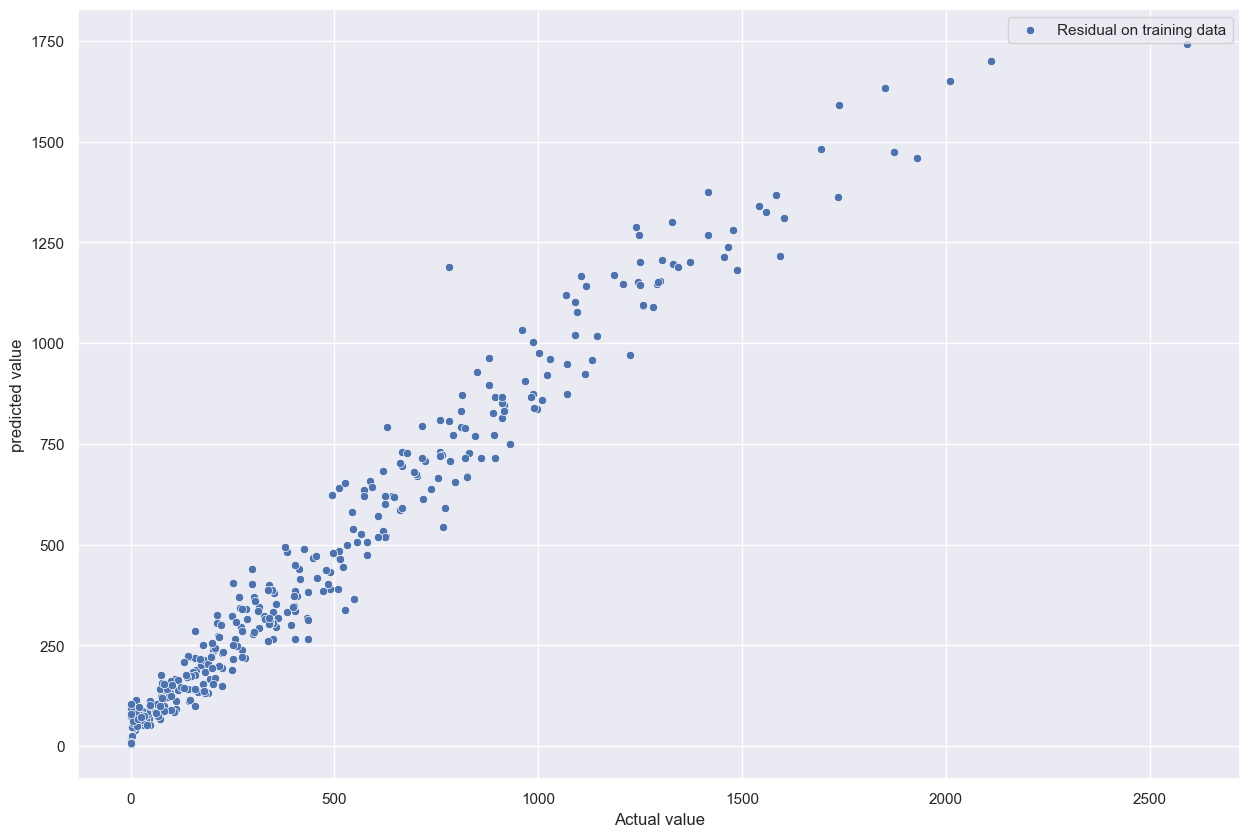

In [90]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=y_train,y=yhat_train)
plt.legend(["Residual on training data"])
plt.xlabel("Actual value")
plt.ylabel("predicted value")

Text(0, 0.5, 'Predicted value')

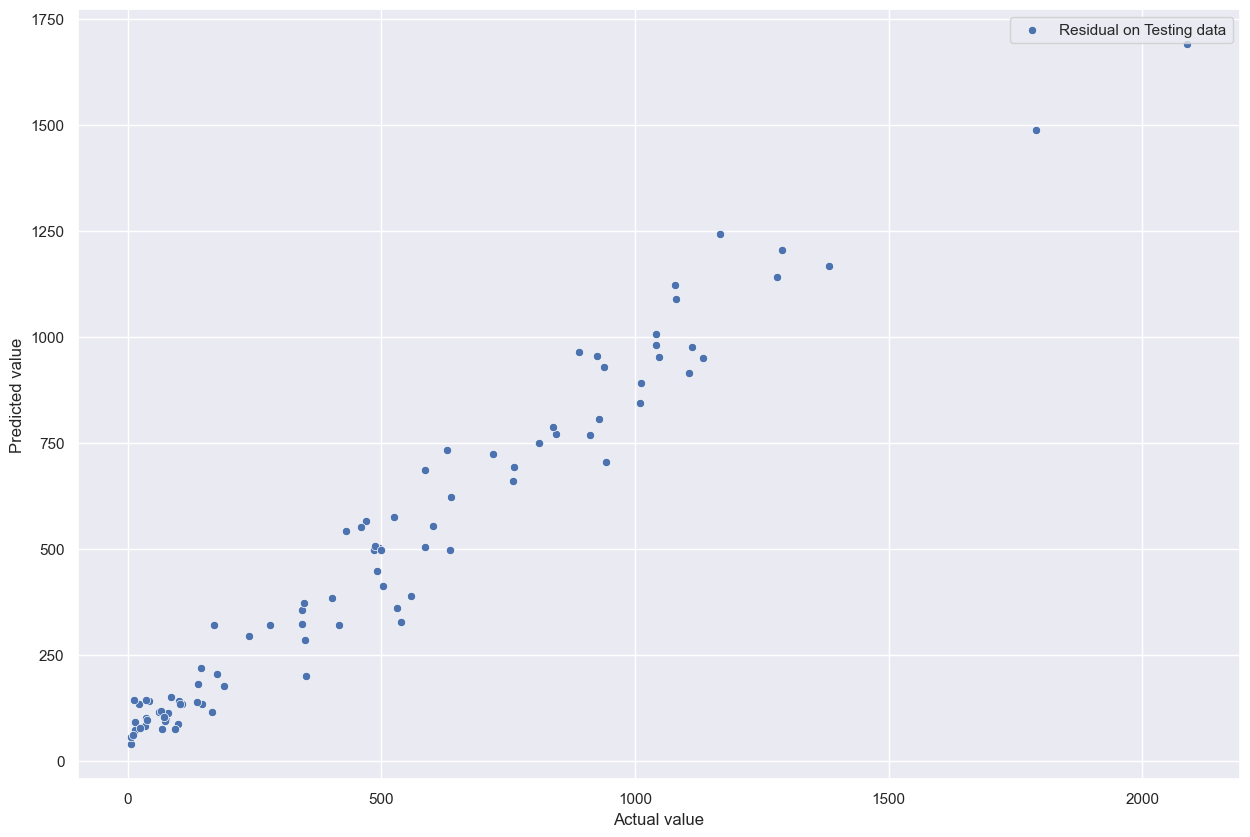

In [91]:
plt.figure(figsize=(15, 10))

sns.scatterplot(x=y_test, y=yhat_test)
plt.legend(["Residual on Testing data"])
plt.xlabel("Actual value")
plt.ylabel("Predicted value")

C:\Users\sandipan\AppData\Local\Temp\ipykernel_5256\667545997.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-yhat_train)


<Axes: xlabel='pts', ylabel='Density'>

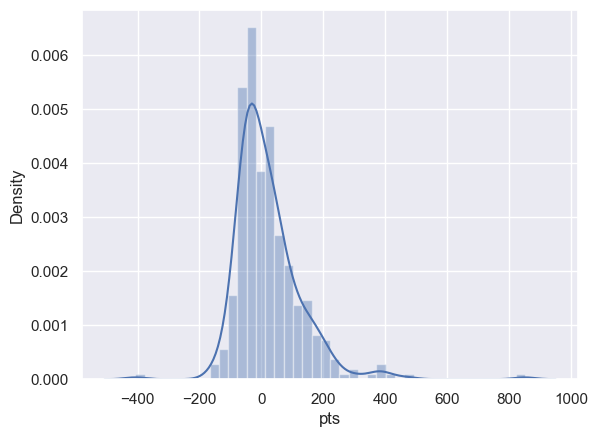

In [92]:
sns.distplot(y_train-yhat_train)

C:\Users\sandipan\AppData\Local\Temp\ipykernel_5256\667545997.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-yhat_train)


<Axes: xlabel='pts', ylabel='Density'>

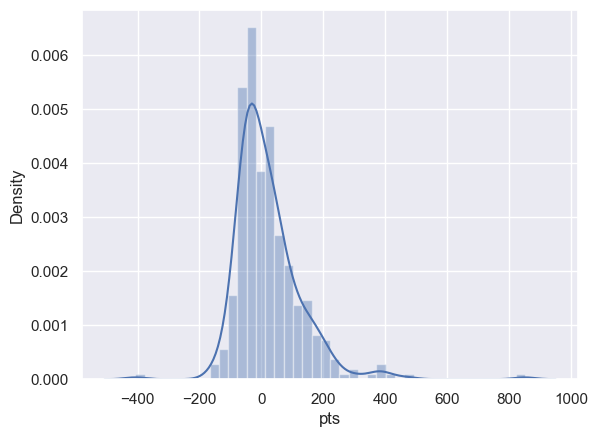

In [93]:
sns.distplot(y_train-yhat_train)